## Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

#### 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

Import the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bank=pd.read_csv('bank_marketing_part1_Data.csv')

Read the data and do exploratory data analysis . Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check.

In [3]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
bank.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


In [5]:
bank.shape

(210, 7)

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


The basic EDA describes the sample data which has 210 rows and 7 columns. There are no null values and all the data types are float.
The data describes the spending, advance payments, credit limit and other data related to the credit card.

In [7]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


By analyzing the min, max, mean and standard deviation of the data, we can conclude that there are no abnormal values and we can proceed for further analysis.

In [8]:
bank.duplicated().sum()

0

There are no duplicate data in the dataset.

Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there.

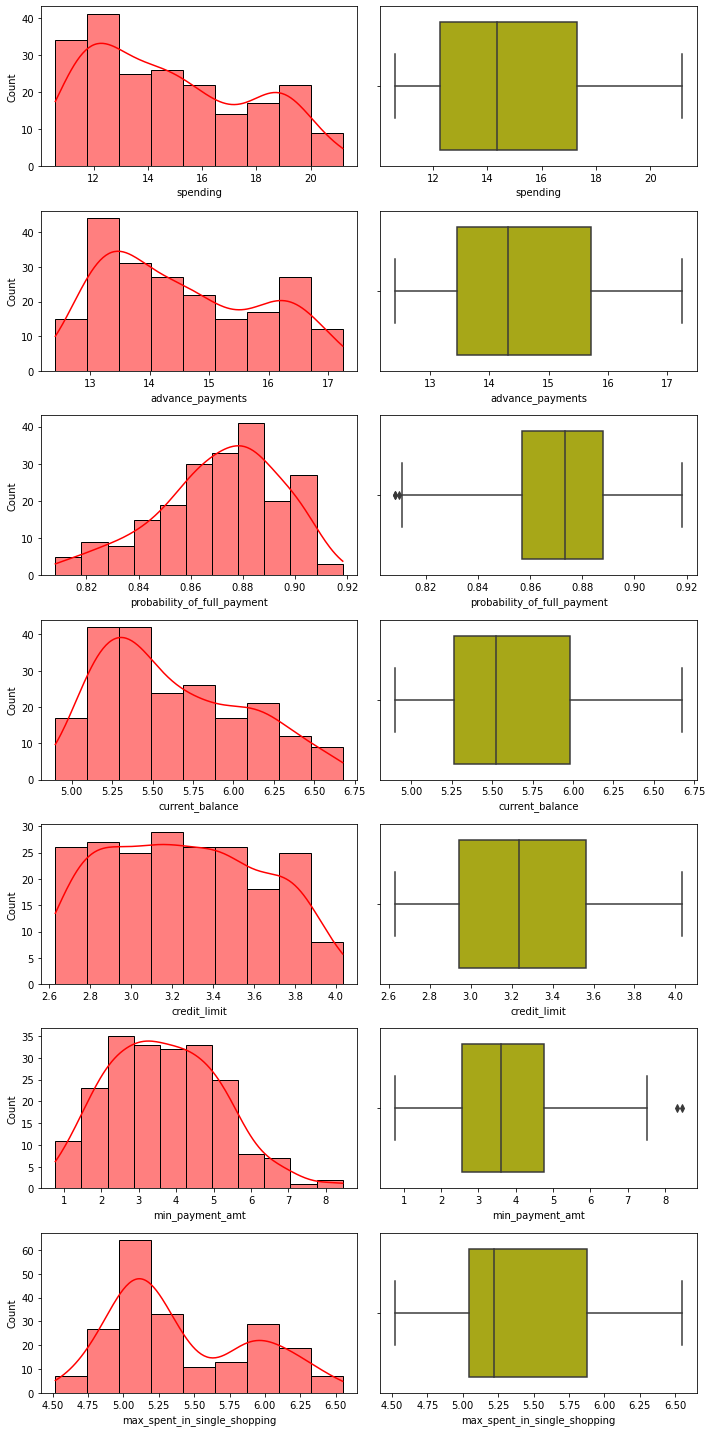

In [9]:
fig,axes=plt.subplots(nrows=7,ncols=2,figsize=(10,20))
x=0
for i in bank:
    sns.histplot(x=bank[i],kde=True,ax=axes[x][0],color='r');
    sns.boxplot(x=bank[i],data=bank,ax=axes[x][1],color='y');
    plt.tight_layout()
    x=x+1

In [10]:
for i in bank.columns:
    print('skewness for column %s is '%i,bank[i].skew())

skewness for column spending is  0.3998891917177586
skewness for column advance_payments is  0.3865727731912213
skewness for column probability_of_full_payment is  -0.5379537283982823
skewness for column current_balance is  0.5254815601318906
skewness for column credit_limit is  0.1343782451316215
skewness for column min_payment_amt is  0.40166734329025183
skewness for column max_spent_in_single_shopping is  0.561897374954866


Spending: Right skewed and no outliers present.
Advance Payments: Right skewed and no outliers present.
Probability of full payment : left skewed ( Negatively skewed) and has outliers below the min value.
Current balance:Right skewed and no outliers present
Credit limit: Almost normally distributed and no outliers present.
Min payment amount:Almost normally distributed and outliers are  present out of the maximum value.
Max spent in single shopping :Right skewed and no outliers present.

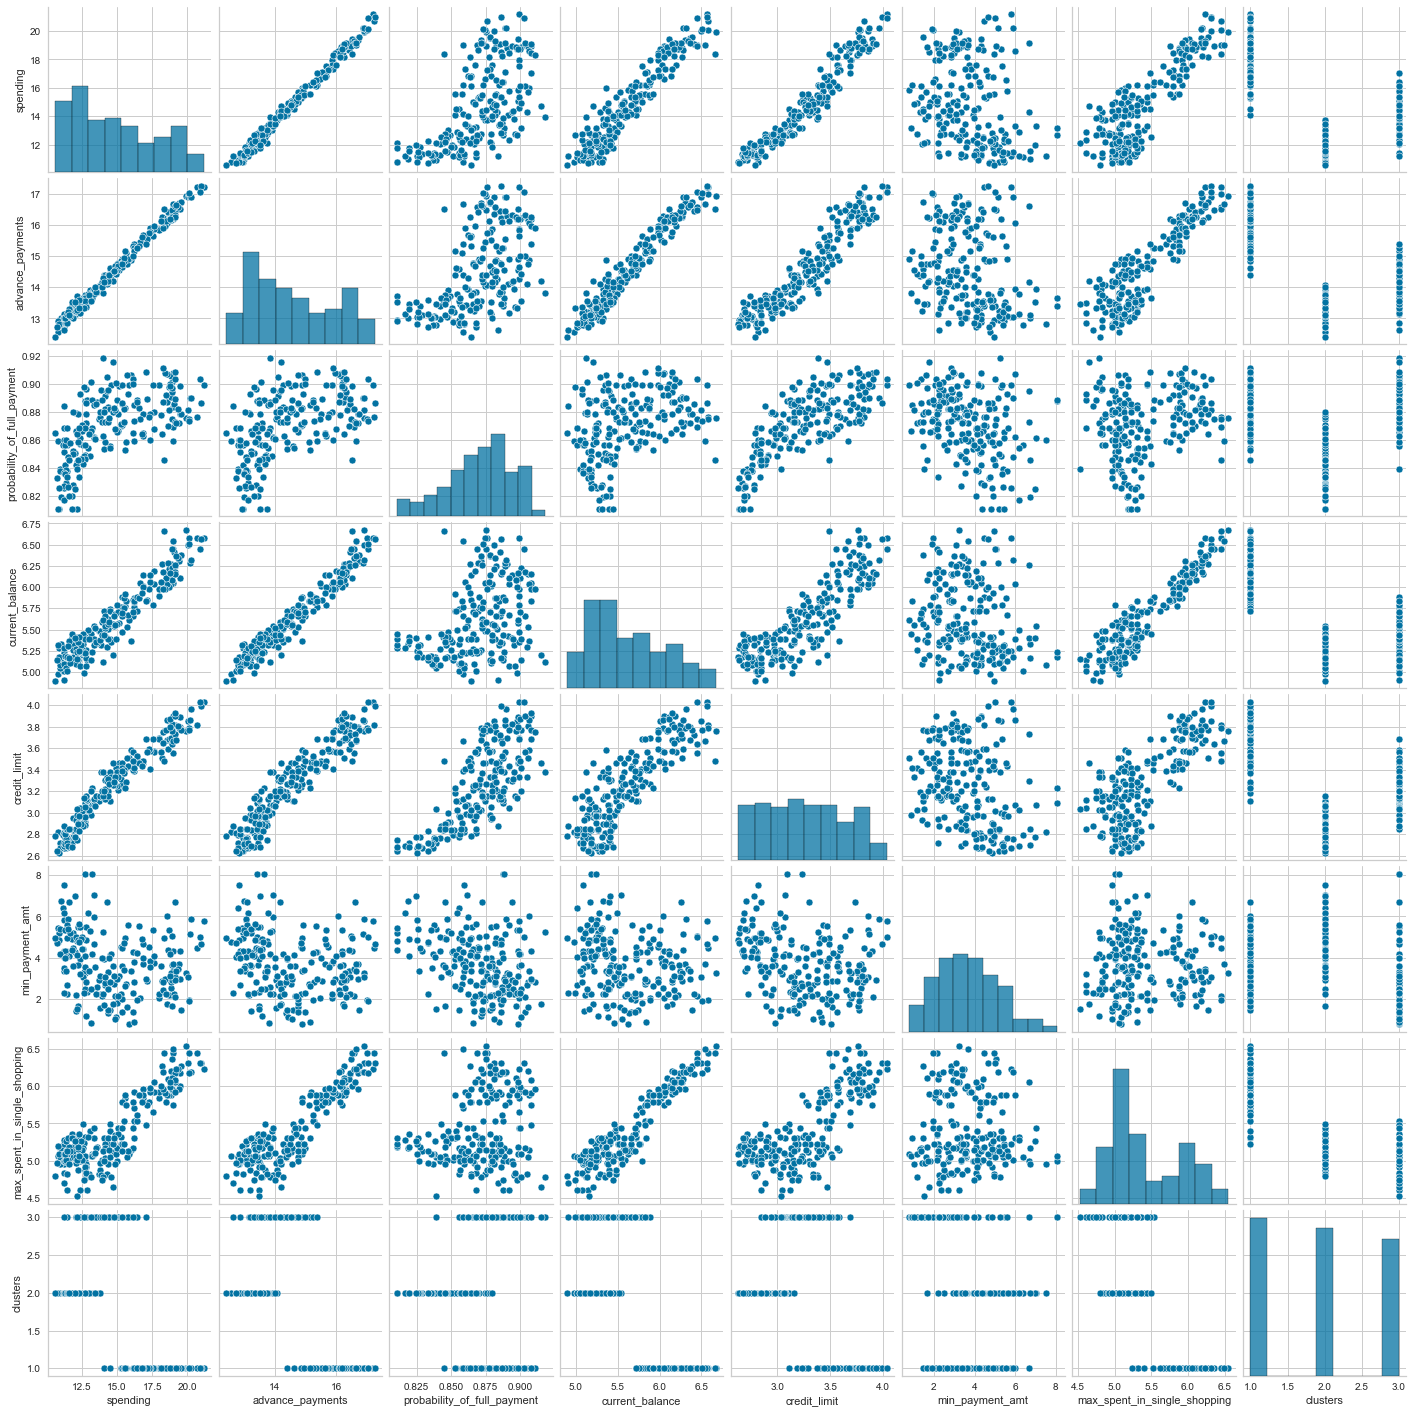

In [137]:
sns.pairplot(data=bank);

Spending, advance payments, current balance,credit limit and max spent in a single shopping are highly correlated with each other.

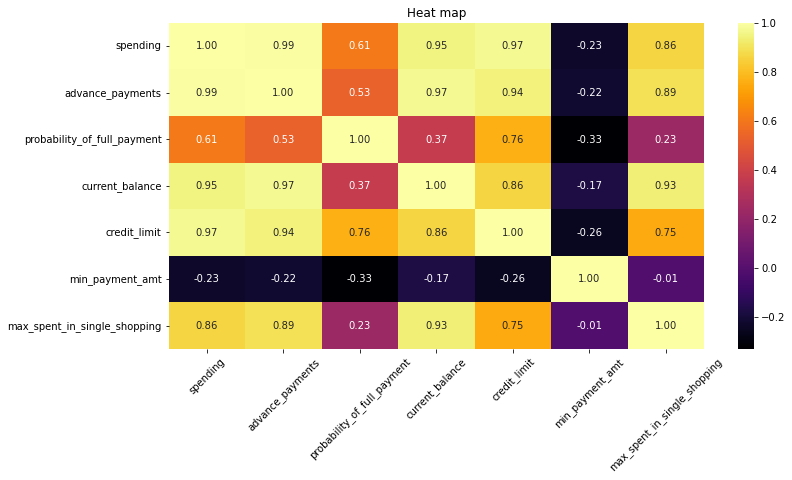

In [12]:
figure=plt.subplots(figsize=(12,5))
sns.heatmap(data=bank.corr(),annot=True,fmt='.2f',cmap='inferno');
plt.xticks(rotation=45)
plt.title('Heat map')
plt.show()

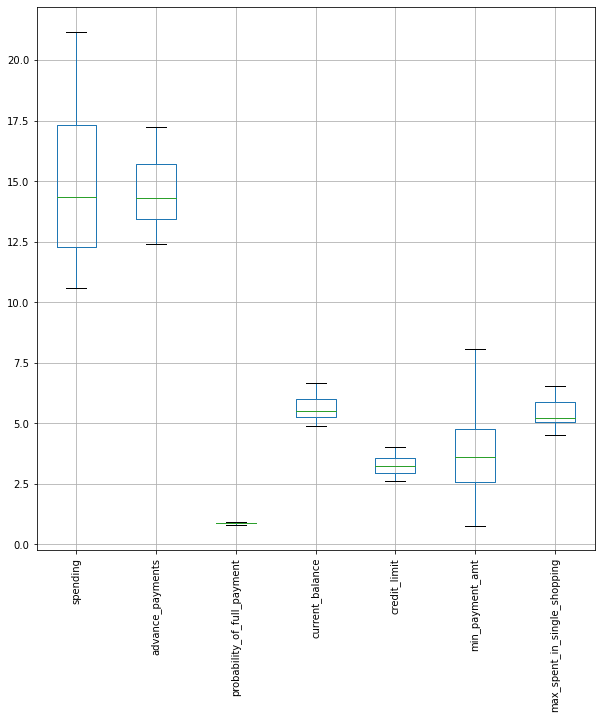

In [13]:
def remove_outlier(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

for i in bank:
    LL,UL=remove_outlier(bank[i])
    bank[i]=np.where(bank[i]>UL,UL,bank[i])
    bank[i]=np.where(bank[i]<LL,LL,bank[i])
    
bank.boxplot(figsize=(10,10))
plt.xticks(rotation=90)
plt.show()

#### 1.2  Do you think scaling is necessary for clustering in this case? Justify

In [14]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.590000,12.27000,14.35500,17.305000,21.180000
advance_payments,210.0,14.559286,1.305959,12.410000,13.45000,14.32000,15.715000,17.250000
probability_of_full_payment,210.0,0.871025,0.023560,0.810588,0.85690,0.87345,0.887775,0.918300
current_balance,210.0,5.628533,0.443063,4.899000,5.26225,5.52350,5.979750,6.675000
credit_limit,210.0,3.258605,0.377714,2.630000,2.94400,3.23700,3.561750,4.033000
min_payment_amt,210.0,3.697288,1.494689,0.765100,2.56150,3.59900,4.768750,8.079625
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.519000,5.04500,5.22300,5.877000,6.550000


As we can see that the mean for spending and advance_payments is considerably different from probability_of_full_payment.
also the standard deviation of different variables are varying from 2.90 to 0.02 hence scaling will be necessary to bring the variables in the same range..

we can use z score, standard scaler or min max scaling method however z scaling is the most commonly used method and we will be using that.

In [15]:
from scipy.stats import zscore

In [16]:
bank_scaled=bank.apply(zscore)

In [17]:
bank_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


In [18]:
bank_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,9.148766e-16,1.002389,-1.466714,-0.887955,-0.169674,0.846599,2.181534
advance_payments,210.0,1.097006e-16,1.002389,-1.649686,-0.851433,-0.183664,0.887069,2.065260
probability_of_full_payment,210.0,1.642601e-15,1.002389,-2.571391,-0.600968,0.103172,0.712647,2.011371
current_balance,210.0,-1.089076e-16,1.002389,-1.650501,-0.828682,-0.237628,0.794595,2.367533
credit_limit,210.0,-2.994298e-16,1.002389,-1.668209,-0.834907,-0.057335,0.804496,2.055112
min_payment_amt,210.0,1.512018e-16,1.002389,-1.966425,-0.761698,-0.065915,0.718559,2.938945
max_spent_in_single_shopping,210.0,-1.935489e-15,1.002389,-1.813288,-0.740495,-0.377459,0.956394,2.328998


Now we can see that the mean and standard deviation are all in the same scale.

#### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [19]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [20]:
link_method=linkage(bank_scaled,method='average')

In [21]:
labellist=np.array(bank_scaled.columns)

In [22]:
labellist

array(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'], dtype=object)

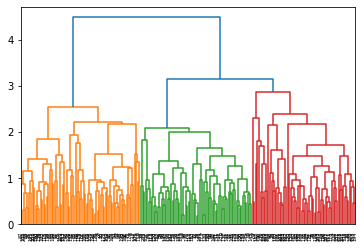

In [23]:
dend=dendrogram(link_method)

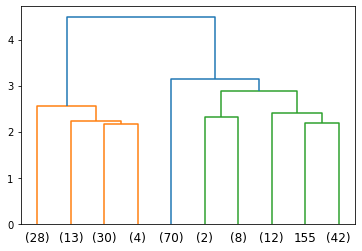

In [24]:
dend=dendrogram(link_method,truncate_mode='lastp',p=10)

From the dendrogram we can see that at depth 3 we are getting a optimised cluster. so we will proceed with depth 3. 
There are various methods we can use for linkage like average method or ward method and also for criterion we have distance, max clust, monocrit etc . we will be using max clust criterion for our analysis.

In [25]:
from scipy.cluster.hierarchy import fcluster

In [26]:
clusters=fcluster(link_method,3,criterion='maxclust')

In [27]:
clusters

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

Appending clusters to original data set

In [28]:
bank['clusters']=clusters

In [29]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [30]:
bank.clusters.value_counts().sort_index()

1    75
2    70
3    65
Name: clusters, dtype: int64

In [31]:
bank.clusters.value_counts(normalize=True).sort_index()

1    0.357143
2    0.333333
3    0.309524
Name: clusters, dtype: float64

Text(0.5, 1.0, 'Pie Chart for Cluster groups')

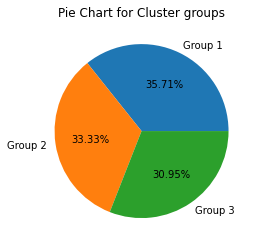

In [32]:
keys=['Group 1','Group 2','Group 3']
plt.pie(bank['clusters'].value_counts().sort_index(),labels=keys,autopct='%0.2f%%');
plt.title('Pie Chart for Cluster groups')

As we can see Group 1 is 35.71%, Group 2 is 33.33% and Group 3 is 30.95% 

#### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [33]:
from sklearn.cluster import KMeans

we need to analyse the output based on different number of clusters and then decide the optimum cluster.

In [34]:
k_means=KMeans(n_clusters=2,random_state=1)

In [35]:
k_means.fit(bank_scaled)

KMeans(n_clusters=2, random_state=1)

In [36]:
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [37]:
k_means.inertia_

659.1474009548498

In [38]:
k_means=KMeans(n_clusters=3,random_state=1)
k_means.fit(bank_scaled)
k_means.inertia_

430.2984817512229

Let us run a for loop to see the various k_means.inertia_ for n number of clusters.

In [39]:
wss=[]
for i in range(2,15):
    KM=KMeans(n_clusters=i,random_state=1)
    KM.fit(bank_scaled)
    wss.append(KM.inertia_)

In [40]:
wss

[659.1474009548498,
 430.2984817512229,
 371.0356644664014,
 325.97412847298756,
 289.45524862464816,
 263.8599444263531,
 239.9444663501791,
 220.59353946108115,
 205.7633419678701,
 192.61102798597136,
 181.68734732044283,
 172.8187457372581,
 164.38896099720947]

Plotting an elbow curve will give us a very clear picture of the K_means.inertia.

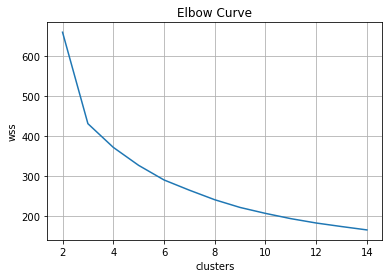

In [41]:
plt.plot(range(2,15),wss);
plt.grid()
plt.xlabel('clusters')
plt.ylabel('wss')
plt.title('Elbow Curve')
plt.show()

From the curve it is very evident that there is a steep fall in the wss score from 2 to 3 cluster and thereafter we see a gradual slope. Hence, from the curve we can conclude that the optimum number of cluster is 3. However we still need to check silhoutte's score and also visualize it using silhoutee visualizer for better understanding and decision making of the optimum number of cluster for the data.

In [42]:
from sklearn.metrics import silhouette_score
from sklearn import metrics

In [43]:
scores = []
k_range = range(2, 15)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(bank_scaled)
    scores.append(metrics.silhouette_score(bank_scaled, km.labels_))
    
scores

[0.46560100442748986,
 0.4008059221522216,
 0.3373662527862716,
 0.28606972536882685,
 0.29061352571270266,
 0.26800642912017386,
 0.2606929498956995,
 0.2605378955390589,
 0.24226558854808167,
 0.25272843010679524,
 0.24563717061683196,
 0.23977944360945233,
 0.24550779274181384]

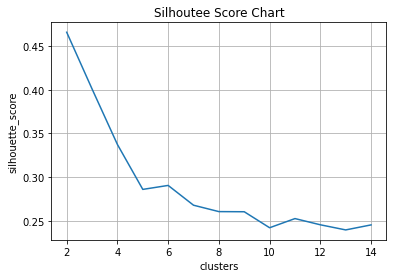

In [44]:
plt.plot(range(2,15),scores);
plt.grid()
plt.xlabel('clusters')
plt.ylabel('silhouette_score')
plt.title('Silhoutee Score Chart')
plt.show()

Let us try to visualize the clusters using SilhouetteVisualizer and determine the optimum number of clusters.

In [45]:
from yellowbrick.cluster import SilhouetteVisualizer

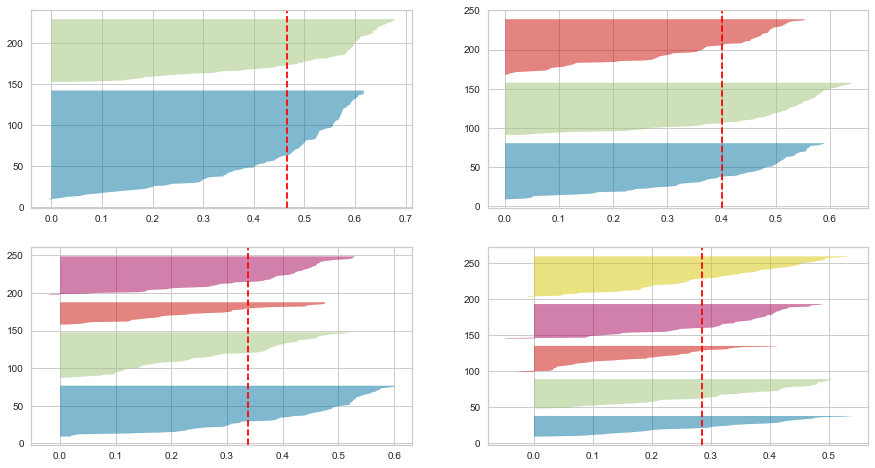

In [46]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))



for i in [2, 3, 4,5]:
   
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=1)
    q, mod = divmod(i, 2)
   
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(bank_scaled)

As we can see the silhoutee plot for number of cluster =3 looks optimum based on the below mentioned criteria.
1.scores below average silhoutee scores- All the scores are above average silhoutte score.
2.Fluctuations in size of plot- we can see that there is very less fluctuation in the size of plot when compared with the other plots.
3.Uniformity in thickness- we can see that for number of cluster =3 there is a much better uniformity.
Hence we can conclude that the best or optimal number of cluster is 3.

#### 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

Cluster was appended to the original data set and we have seen the clsuter pie chart above for all the 3 groups.

In [47]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [48]:
bank.groupby('clusters').mean().reset_index()

,clusters,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040
1,2,11.916857,13.291000,0.846845,5.258300,2.846000,4.619000,5.115071
2,3,14.217077,14.195846,0.884869,5.442000,3.253508,2.759007,5.055569


Text(0.5, 1.0, 'Pie Chart for Cluster groups')

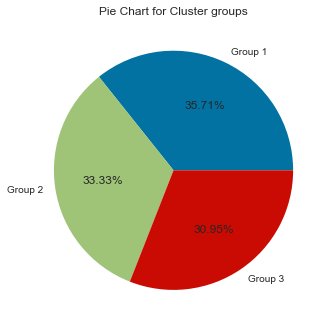

In [49]:
keys=['Group 1','Group 2','Group 3']
plt.pie(bank['clusters'].value_counts().sort_index(),labels=keys,autopct='%0.2f%%');
plt.title('Pie Chart for Cluster groups')

In [50]:
new_df=pd.DataFrame(bank.groupby('clusters').sum().reset_index()[['spending','clusters']])
new_df

,spending,clusters
0,1359.69,1
1,834.18,2
2,924.11,3


Text(0.5, 1.0, 'Barplot Spending Vs Clusters')

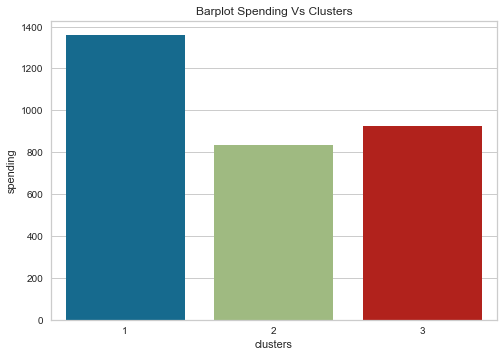

In [51]:
sns.barplot(data=new_df,x='clusters',y='spending');
plt.title('Barplot Spending Vs Clusters')

As we can observe Group 1 has the highest spending followed by Group 3 and Group 2. 
We can now correlate advance payments, current balance,credit limit and max spent in a single shopping with the groups and infer the following points:
Group 1 belongs to an elite group of customers.They are the most promising customers and should be given special privilages and prime membership options with the best category card like platinum or titanium card. 
Group 3 falls in between and can be encouraged to use more of the bank's services and avail various benefits. They can be counseled via various marketting strategies like email or tele marketting to use their cards and avail more benefites than they are avialing at the present moment.
However, Group 2 needs real motivation for using their cards and bank can think of giving them special offers and benefits to ensure that these customers increase their card usage.These customers should be made aware of the various benefits they can avail like cash back, points redemptions and promonotional offers or zero cost emi options on various shopping merchandise. These initiatives will help them improve the usage and inturn will be profiatble for the company.

## Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

#### 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [52]:
df=pd.read_csv('insurance_part2_data.csv')

In [53]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [54]:
df.tail()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


In [55]:
df.shape

(3000, 10)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


The basic EDA describes the sample data which has 3000 rows and 10 columns. There are no null values and the data types are float64, int64 and object.
The data describes the Age, Agency code,Type, Commmision,Channel,Duration,Sales,Product Name and Destination of various customer and also gives the insurance claimed status.

In [57]:
df.duplicated().sum()

139

In [58]:
dups=df.duplicated()
df[dups]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


We have 139 duplicate rows but we cannot be sure as there is no reference to customer name  or account id or any other detail which can distinguish the customers data. we can assume here that same set of plan was issued to different customers by same agency,type and for same destination. Hence we will not drop the duplicate data.

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


Duration has an abnormal value which is -1 for minimum duration. we will replace it with mean before modelling.

#### Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables.

Let us seperate the continous and categorical data.

In [60]:
continous=df.select_dtypes('number')
categorical=df.select_dtypes('object')

In [61]:
continous.head()

,Age,Commision,Duration,Sales
0,48,0.70,7,2.51
1,36,0.00,34,20.00
2,39,5.94,3,9.90
3,36,0.00,4,26.00
4,33,6.30,53,18.00


In [62]:
categorical.head()

,Agency_Code,Type,Claimed,Channel,Product Name,Destination
0,C2B,Airlines,No,Online,Customised Plan,ASIA
1,EPX,Travel Agency,No,Online,Customised Plan,ASIA
2,CWT,Travel Agency,No,Online,Customised Plan,Americas
3,EPX,Travel Agency,No,Online,Cancellation Plan,ASIA
4,JZI,Airlines,No,Online,Bronze Plan,ASIA


Now let us plot the histogram and boxplot for all the continous data.

Index(['Age', 'Commision', 'Duration', 'Sales'], dtype='object')


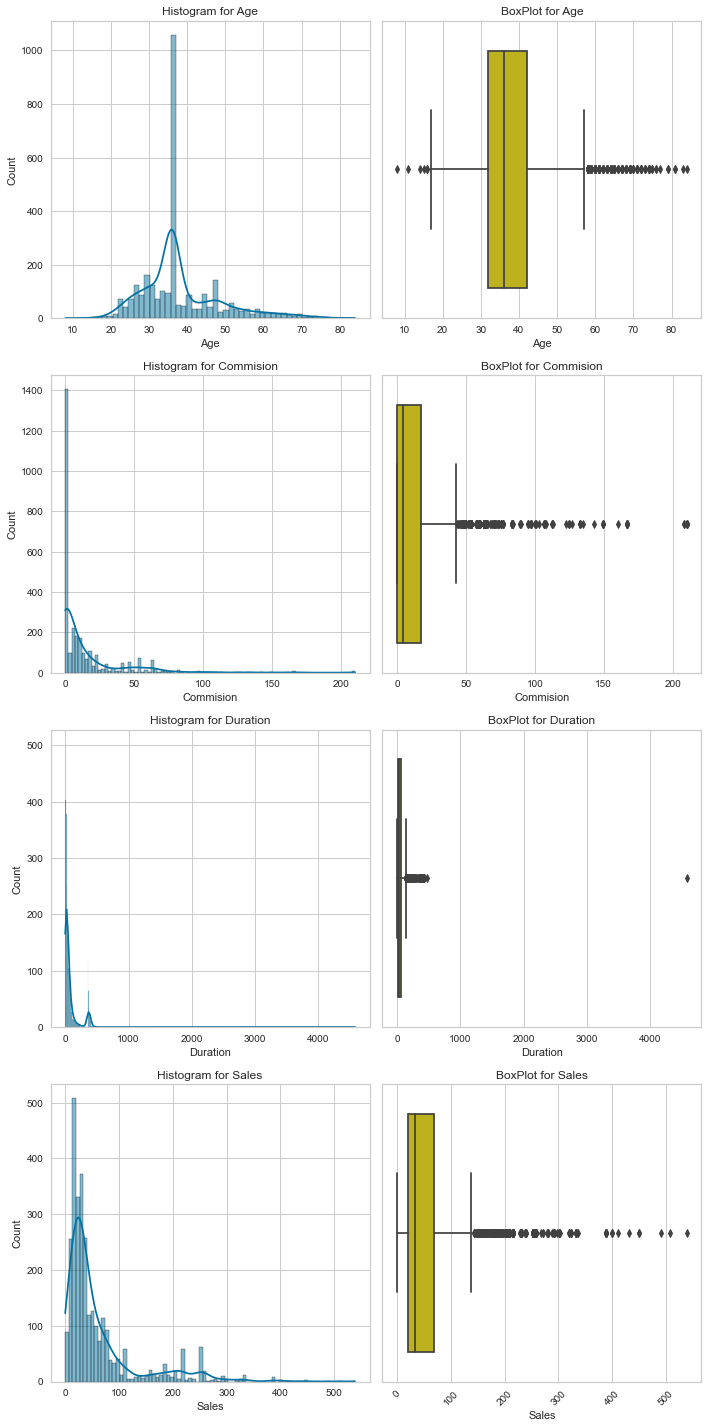

In [63]:
column_list=continous.columns
print(column_list)
fig, axes = plt.subplots(nrows=4,ncols=2)

fig.set_size_inches(10,20)
x=0
y=0
for i in column_list:
    
    
    histplot=sns.histplot(x=continous[i], kde=True, ax=axes[x][y], color='b');
    boxplot=sns.boxplot(x=continous[i], data=continous, ax=axes[x][y+1], color='y');
    plt.xticks(rotation=45)
    histplot.set(xlabel=i,title='Histogram for '+i)
    boxplot.set(xlabel=i,title='BoxPlot for '+i)
    plt.tight_layout()
    x=x+1

In [64]:
for i in continous.columns:
    print('skewness for column %s is '%i,continous[i].skew())

skewness for column Age is  1.149712770495169
skewness for column Commision is  3.148857772356885
skewness for column Duration is  13.784681027519602
skewness for column Sales is  2.381148461687274


Age: Normally distributed and has a lot of outliers.
comission: Right skewed and has lot of outliers.
Duration:Right skewed and has lot of outliers.
Sales:Right skewed and has lot of outliers.

Now let us plot the countplot and boxplot for all the continous data.

Index(['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name',
       'Destination'],
      dtype='object')
Figure(576x396) [[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


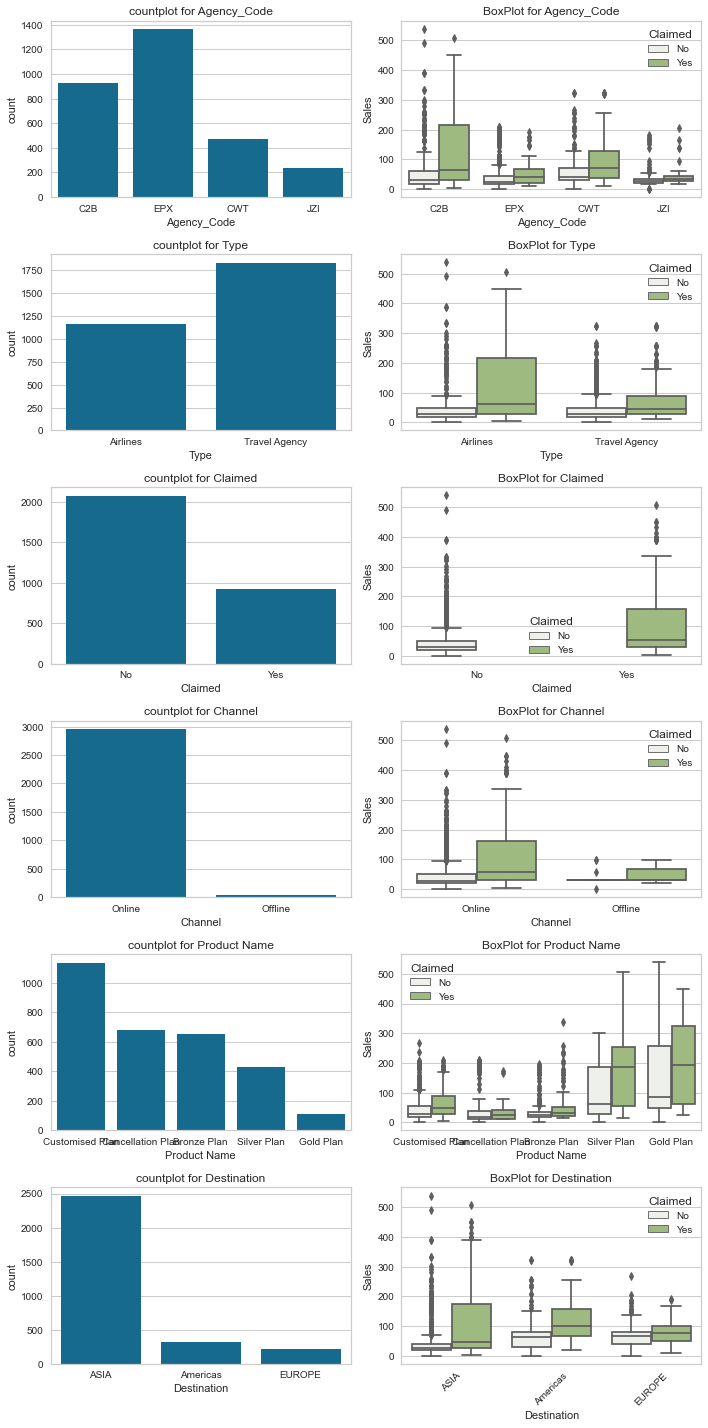

In [65]:
column_list=categorical.columns
print(column_list)
fig, axes = plt.subplots(nrows=6,ncols=2)
print(fig,axes)
fig.set_size_inches(10,20)
x=0
y=0
for i in column_list:
   
    
    histplot=sns.countplot(x=categorical[i], ax=axes[x][y], color='b');
    boxplot=sns.boxplot(data=df,x=df[i],y='Sales',hue='Claimed',ax=axes[x][y+1], color='g');
    plt.xticks(rotation=45)
    histplot.set(xlabel=i,title='countplot for '+i)
    boxplot.set(xlabel=i,title='BoxPlot for '+i)
    plt.tight_layout()
    x=x+1

Agency code: EPX has the maximum count while C2B and CWT has the maximum number of claims settled.
Type: Travel agencies have more count than airlines however airlines has more number of claims settled.
channel: Online dominates both in count and claim settled.
Product name: Customized plan is the maximum and Gold plan has the maximum number of claim settled with least customer count.
Destination: Maximum count is from Asia and Americas has the highest median for claim settled.

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [67]:
df['Duration']=np.where(df['Duration']==-1,df['Duration'].mean(),df['Duration'])

In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.025000,134.047041,0.0,11.0,27.00,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


##### Multivariate analysis.

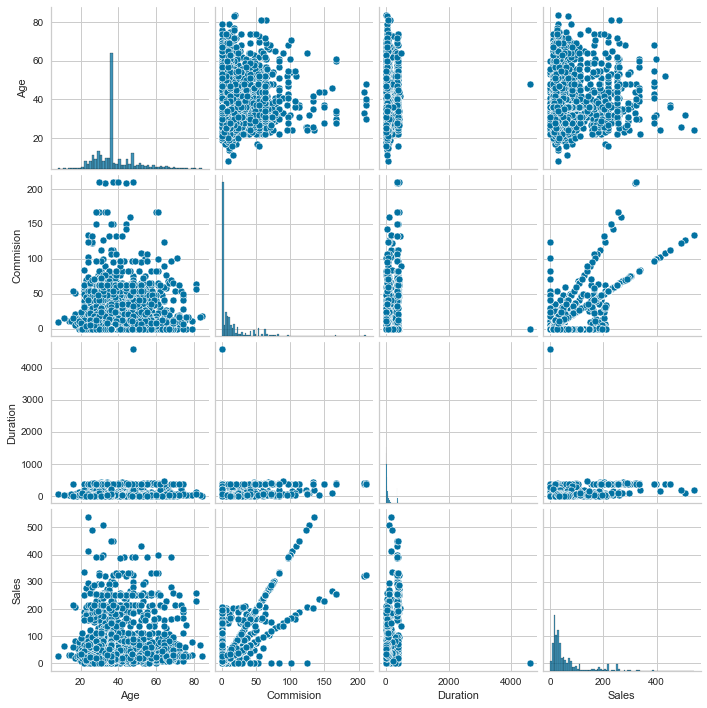

In [69]:
sns.pairplot(data=df);

Sales and commission are highly correlated. other variables are not much correlated with each other.

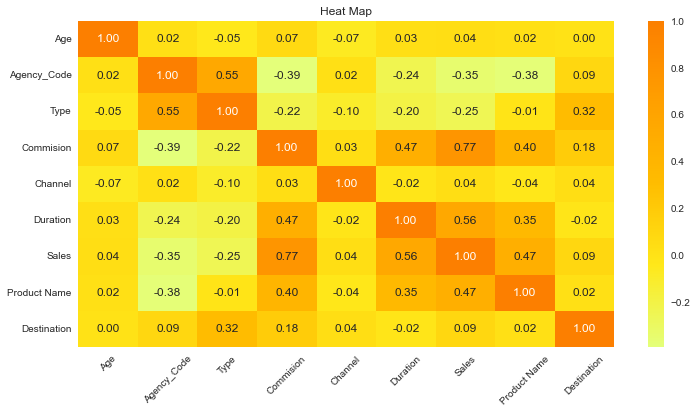

In [138]:
figure=plt.subplots(figsize=(12,6))
sns.heatmap(data=df.corr(),annot=True,fmt='.2f',cmap='Wistia');
plt.xticks(rotation=45)
plt.title('Heat Map')
plt.show()

We can see the correlation between sales and comission is 0.77. Other varibles does not have much higher correlation with each other.

#### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [71]:
for datatype in df.columns: 
    if df[datatype].dtype == 'object': 
        print('\n')
        print('datatype:',datatype)
        print(pd.Categorical(df[datatype].unique()))
        print(pd.Categorical(df[datatype].unique()).codes)
        df[datatype] = pd.Categorical(df[datatype]).codes



datatype: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


datatype: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


datatype: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


datatype: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


datatype: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


datatype: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [72]:
df['Claimed'].sum()/3000*100

30.8

The percentage of claim as per the data is 30.8%

In [73]:
x=df.drop('Claimed',axis=1)
y=df.pop('Claimed')

In [74]:
x.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7.0,2.51,2,0
1,36,2,1,0.00,1,34.0,20.00,2,0
2,39,1,1,5.94,1,3.0,9.90,2,1
3,36,2,1,0.00,1,4.0,26.00,1,0
4,33,3,0,6.30,1,53.0,18.00,0,0


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)

We are splitting the data into train and test set and the test size is 30% of the total observation.

In [77]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('Total Obs',2100+900)

x_train (2100, 9)
x_test (900, 9)
y_train (2100,)
y_test (900,)
Total Obs 3000


##### Decison Tree-CART MODEL

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dt_model=DecisionTreeClassifier(criterion='gini')

In [80]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [81]:
from sklearn import tree

In [82]:
train_char_label = ['No', 'Yes']
claim_Tree_File = open('d:\claim_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=claim_Tree_File, 
                                feature_names = list(x_train), 
                                class_names = list(train_char_label))

claim_Tree_File.close()

In [83]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], 
                    index = x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Duration      0.263308
Sales         0.206649
Agency_Code   0.194356
Age           0.181361
Commision     0.087359
Product Name  0.037397
Destination   0.017622
Channel       0.008469
Type          0.003478


From the above output we can see that Duration has the highest weightage in terms of importance followed by sales and Agency code.The least important factor is Type.

without setting the parameters the decision tree has overgrown as visualized in the graphviz. we need to prune the decision tree. we will use a grid search cross validation for the decision tree.

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
param_grid={
    'max_depth':[7,8,9,10],
    'min_samples_leaf':[80,90,100],
    'min_samples_split':[240,270,300],
}

min samples leaf should be roughly equal to 1-3% of the total observations.
min sample split should be around 3 times the min sample leaf. we need to try a number of combinantions to find out the best parameters for our Decision Tree model.

In [86]:
dt_model=DecisionTreeClassifier()

In [87]:
grid_search=GridSearchCV(estimator=dt_model,param_grid=param_grid,cv=3)

In [88]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [7, 8, 9, 10],
                         'min_samples_leaf': [80, 90, 100],
                         'min_samples_split': [240, 270, 300]})

In [89]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_leaf': 80, 'min_samples_split': 240}

as we can observe the grid search best parameters has given max depth of 7, min sample leaf of 80 and min sample split of 240 which are on the extreme left of our parameters. To find the optimal solution we can do the grid search again with the above paremeter as centered figures.

In [90]:
param_grid={
    'max_depth':[5,6,7,8],
    'min_samples_leaf':[60,70,80,90],
    'min_samples_split':[180,210,240,270],
}

In [91]:
dt_model=DecisionTreeClassifier()

In [92]:
grid_search=GridSearchCV(estimator=dt_model,param_grid=param_grid,cv=3)

In [93]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'min_samples_leaf': [60, 70, 80, 90],
                         'min_samples_split': [180, 210, 240, 270]})

In [94]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 60, 'min_samples_split': 180}

In [95]:
param_grid={
    'max_depth':[3,4,5],
    'min_samples_leaf':[20,30,40],
    'min_samples_split':[90,120,150,180],
}
dt_model=DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=dt_model,param_grid=param_grid,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_leaf': [20, 30, 40],
                         'min_samples_split': [90, 120, 150, 180]})

In [96]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 30, 'min_samples_split': 120}

we can see now that the best parameters are ..
max depth of 5, min sample leaf of 30 and min sample split of 120

In [97]:
best_grid_dt_model=grid_search.best_estimator_

In [98]:
y_train_predict_dt_model=best_grid_dt_model.predict(x_train)
y_test_predict_dt_model=best_grid_dt_model.predict(x_test)

Our CART model is ready for predicting the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

##### RANDOM FOREST CLASSIFIER(RFCL)

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
param_grid={
    'max_depth':[3,4,5],
    'max_features':[4,5,6],
    'min_samples_leaf':[20,30,40],
    'min_samples_split':[90,120,150,180],
    'n_estimators':[101,301]
}

rfcl=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rfcl,param_grid=param_grid,cv=3)

In [101]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5], 'max_features': [4, 5, 6],
                         'min_samples_leaf': [20, 30, 40],
                         'min_samples_split': [90, 120, 150, 180],
                         'n_estimators': [101, 301]})

In [102]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 5,
 'min_samples_leaf': 20,
 'min_samples_split': 90,
 'n_estimators': 301}

In [103]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, max_features=5, min_samples_leaf=20,
                       min_samples_split=90, n_estimators=301)

we can try to look for a more better solution.

In [104]:
param_grid={
    'max_depth':[3,4,5,6],
    'max_features':[2,3,4],
    'min_samples_leaf':[10,20,25],
    'min_samples_split':[80,90,100],
    'n_estimators':[101,201,301]
}

rfcl=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rfcl,param_grid=param_grid,cv=3)

In [105]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6], 'max_features': [2, 3, 4],
                         'min_samples_leaf': [10, 20, 25],
                         'min_samples_split': [80, 90, 100],
                         'n_estimators': [101, 201, 301]})

In [106]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 3,
 'min_samples_leaf': 10,
 'min_samples_split': 80,
 'n_estimators': 101}

In [107]:
best_grid_rfcl=grid_search.best_estimator_

In [108]:
y_train_predict_rfcl=best_grid_rfcl.predict(x_train)
y_test_predict_rfcl=best_grid_rfcl.predict(x_test)

Our RFCL model is ready for predicting the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model.

##### ARTIFICIAL NEURAL NETWORK (ANN)

For ANN it is important to scale the data.

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [110]:
sc=StandardScaler()

In [111]:
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [112]:
param_grid={
    'hidden_layer_sizes':[100,100],
    'activation':['logistic','relu'],
    'solver':['sgd','adam'],
    'tol':[0.1,0.01],
    'max_iter':[1000],
    
}

mlp=MLPClassifier()
grid_search=GridSearchCV(estimator=mlp,param_grid=param_grid,cv=3)

In [113]:
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [100, 100], 'max_iter': [1000],
                         'solver': ['sgd', 'adam'], 'tol': [0.1, 0.01]})

In [114]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 100,
 'max_iter': 1000,
 'solver': 'adam',
 'tol': 0.01}

In [115]:
best_grid_mlp=grid_search.best_estimator_

In [116]:
clf=MLPClassifier(hidden_layer_sizes=100,max_iter=1000,solver='adam',verbose=True,
                 random_state=21,tol=0.01)

In [117]:
clf.fit(x_train_scaled,y_train)
y_pred=clf.predict(x_test_scaled)

Iteration 1, loss = 0.61364553
Iteration 2, loss = 0.55129553
Iteration 3, loss = 0.51554654
Iteration 4, loss = 0.49724773
Iteration 5, loss = 0.48744163
Iteration 6, loss = 0.48234826
Iteration 7, loss = 0.47921250
Iteration 8, loss = 0.47782275
Iteration 9, loss = 0.47660548
Iteration 10, loss = 0.47583911
Iteration 11, loss = 0.47496588
Iteration 12, loss = 0.47429522
Iteration 13, loss = 0.47375464
Iteration 14, loss = 0.47321975
Iteration 15, loss = 0.47258170
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


In [118]:
y_train_predict_mlp=best_grid_mlp.predict(x_train_scaled)
y_test_predict_mlp=best_grid_mlp.predict(x_test_scaled)

Our ANN model is ready for predicting the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model.

#### 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

##### CART Model

In [119]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,accuracy_score,roc_auc_score,roc_curve

Check the Metrics for Predictions on the Training set

[Accuracy Score, Classification Report, Confusion Matrix]

Accuracy for DecisionTreeClassifier training model is 
 0.7971428571428572


Classification report for DecisionTreeClassifier training model is 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1471
           1       0.69      0.58      0.63       629

    accuracy                           0.80      2100
   macro avg       0.76      0.74      0.75      2100
weighted avg       0.79      0.80      0.79      2100



Confusion Matrix for DecisionTreeClassifier training model is


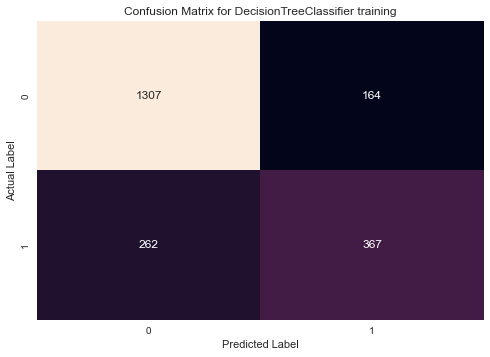

In [120]:
models_names={dt_model:'DecisionTreeClassifier training'}

print('Accuracy for {} model is'.format(models_names[dt_model]),'\n',accuracy_score(y_train,y_train_predict_dt_model))
print('\n')
print('Classification report for {} model is'.format(models_names[dt_model]),'\n',classification_report(y_train,y_train_predict_dt_model))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[dt_model]))
sns.heatmap(confusion_matrix(y_train,y_train_predict_dt_model),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[dt_model]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

AUC:  0.837


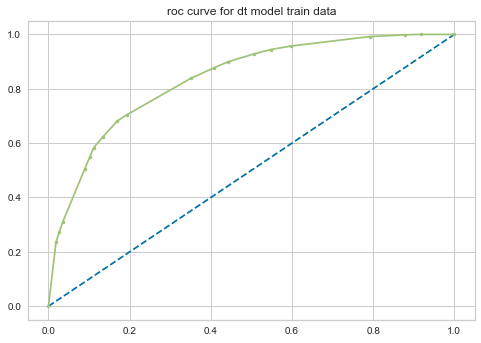

In [121]:
probs_dt_model=best_grid_dt_model.predict_proba(x_train)
probs_dt_model=probs_dt_model[:,1]

auc=roc_auc_score(y_train,probs_dt_model)
print('AUC: % .3f'%auc)

fpr,tpr,threshold=roc_curve(y_train,probs_dt_model)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.title('roc curve for dt model train data')
plt.show()

Check the Metrics for Predictions on the Test set

[Accuracy Score, Classification Report, Confusion Matrix]

Accuracy for DecisionTreeClassifier test model is 
 0.7655555555555555


Classification report for DecisionTreeClassifier test model is 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.71      0.47      0.57       295

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.70       900
weighted avg       0.76      0.77      0.75       900



Confusion Matrix for DecisionTreeClassifier test model is


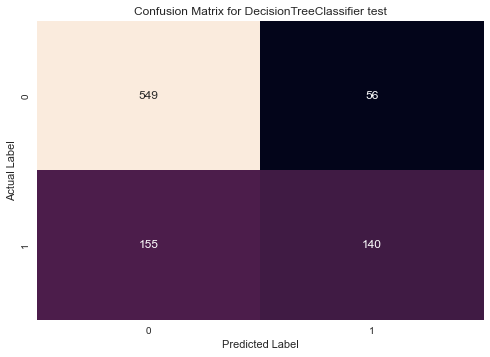

In [122]:
models_names={dt_model:'DecisionTreeClassifier test'}

print('Accuracy for {} model is'.format(models_names[dt_model]),'\n',accuracy_score(y_test,y_test_predict_dt_model))
print('\n')
print('Classification report for {} model is'.format(models_names[dt_model]),'\n',classification_report(y_test,y_test_predict_dt_model))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[dt_model]))
sns.heatmap(confusion_matrix(y_test,y_test_predict_dt_model),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[dt_model]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

AUC:  0.800


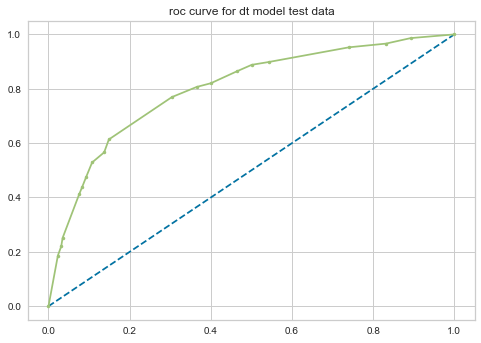

In [123]:
probs_dt_model=best_grid_dt_model.predict_proba(x_test)
probs_dt_model=probs_dt_model[:,1]

auc=roc_auc_score(y_test,probs_dt_model)
print('AUC: % .3f'%auc)

fpr,tpr,threshold=roc_curve(y_test,probs_dt_model)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.title('roc curve for dt model test data')
plt.show()

AS we can see that the accuracy of train model is 80.0, recall is 0.58,precision is 0.69 and auc is 83.7 whereas for test data the accuracy is 77.0, recall is 0.47, precision is 0.71 and auc is 80.0. Although the test data is performing close to the train data we definitely have a room here for improvement in our training data to improve the accuracy further.

##### RANDOM FOREST CLASSIFIER(RFCL)

Check the Metrics for Predictions on the Training set

[Accuracy Score, Classification Report, Confusion Matrix]

Accuracy for RandomForestClassifier training model is 
 0.8047619047619048


Classification report for RandomForestClassifier training model is 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1471
           1       0.73      0.55      0.63       629

    accuracy                           0.80      2100
   macro avg       0.78      0.73      0.75      2100
weighted avg       0.80      0.80      0.80      2100



Confusion Matrix for RandomForestClassifier training model is


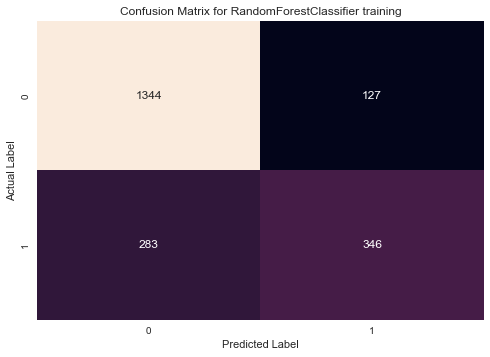

In [124]:
models_names={rfcl:'RandomForestClassifier training'}

print('Accuracy for {} model is'.format(models_names[rfcl]),'\n',accuracy_score(y_train,y_train_predict_rfcl))
print('\n')
print('Classification report for {} model is'.format(models_names[rfcl]),'\n',classification_report(y_train,y_train_predict_rfcl))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[rfcl]))
sns.heatmap(confusion_matrix(y_train,y_train_predict_rfcl),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[rfcl]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

AUC:  0.842


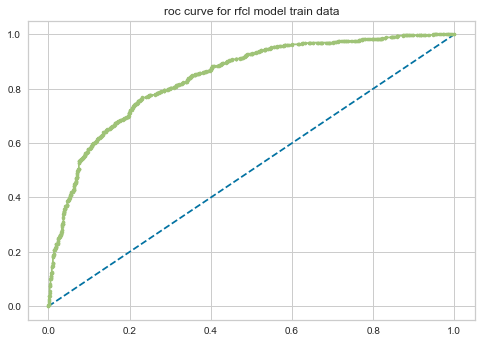

In [125]:
probs_rfcl_model=best_grid_rfcl.predict_proba(x_train)
probs_rfcl_model=probs_rfcl_model[:,1]

auc=roc_auc_score(y_train,probs_rfcl_model)
print('AUC: % .3f'%auc)

fpr,tpr,threshold=roc_curve(y_train,probs_rfcl_model)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.title('roc curve for rfcl model train data')
plt.show()

Check the Metrics for Predictions on the Test set

[Accuracy Score, Classification Report, Confusion Matrix]

Accuracy for RandomForestClassifier test model is 
 0.7633333333333333


Classification report for RandomForestClassifier test model is 
               precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.73      0.44      0.55       295

    accuracy                           0.76       900
   macro avg       0.75      0.68      0.70       900
weighted avg       0.76      0.76      0.74       900



Confusion Matrix for RandomForestClassifier test model is


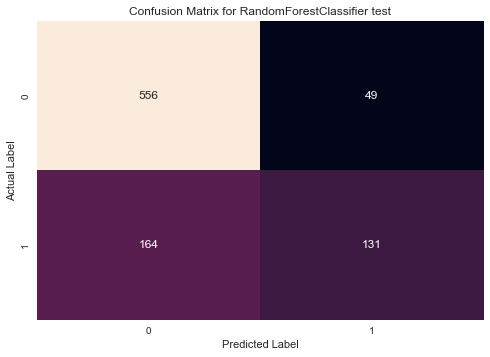

In [126]:
models_names={rfcl:'RandomForestClassifier test'}

print('Accuracy for {} model is'.format(models_names[rfcl]),'\n',accuracy_score(y_test,y_test_predict_rfcl))
print('\n')
print('Classification report for {} model is'.format(models_names[rfcl]),'\n',classification_report(y_test,y_test_predict_rfcl))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[rfcl]))
sns.heatmap(confusion_matrix(y_test,y_test_predict_rfcl),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[rfcl]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

AUC:  0.815


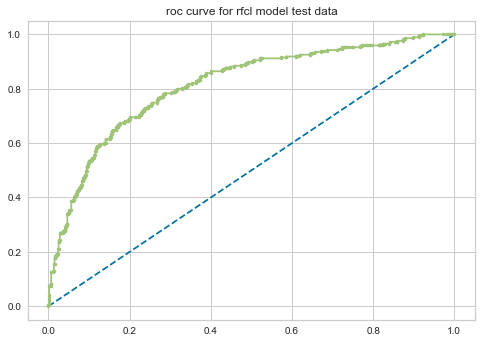

In [127]:
probs_rfcl_model=best_grid_rfcl.predict_proba(x_test)
probs_rfcl_model=probs_rfcl_model[:,1]

auc=roc_auc_score(y_test,probs_rfcl_model)
print('AUC: % .3f'%auc)

fpr,tpr,threshold=roc_curve(y_test,probs_rfcl_model)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.title('roc curve for rfcl model test data')
plt.show()

AS we can see that the accuracy of train model is 81.0, recall is 0.57,precision is 0.73 and auc is 84.8 whereas for test data the accuracy is 77.0, recall is 0.46, precision is 0.74 and auc is 81.9. Although the test data is performing close to the train data we definitely have a room here for improvement in our training data to improve the accuracy further. With respect to the Decision Tree (CART) model Random Forest model has performed slightly better in this case.

##### ARTIFICIAL NEURAL NETWORK (ANN)

Check the Metrics for Predictions on the Training set

[Accuracy Score, Classification Report, Confusion Matrix]

Accuracy for ANN training model is 
 0.7723809523809524


Classification report for ANN training model is 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85      1471
           1       0.67      0.48      0.56       629

    accuracy                           0.77      2100
   macro avg       0.73      0.69      0.70      2100
weighted avg       0.76      0.77      0.76      2100



Confusion Matrix for ANN training model is


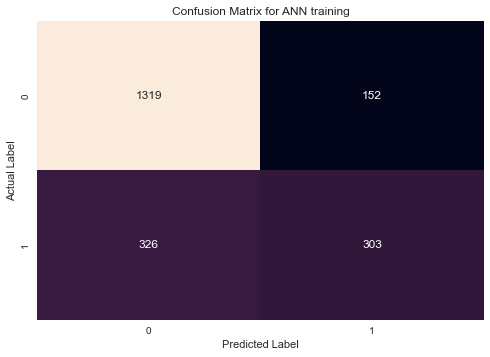

In [128]:
models_names={mlp:'ANN training'}

print('Accuracy for {} model is'.format(models_names[mlp]),'\n',accuracy_score(y_train,y_train_predict_mlp))
print('\n')
print('Classification report for {} model is'.format(models_names[mlp]),'\n',classification_report(y_train,y_train_predict_mlp))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[mlp]))
sns.heatmap(confusion_matrix(y_train,y_train_predict_mlp),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[mlp]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

AUC:  0.813


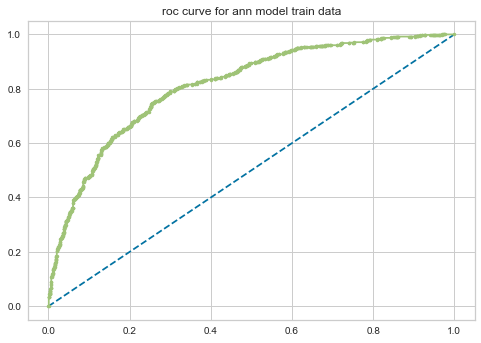

In [129]:
probs_ann_model=best_grid_mlp.predict_proba(x_train_scaled)
probs_ann_model=probs_ann_model[:,1]

auc=roc_auc_score(y_train,probs_ann_model)
print('AUC: % .3f'%auc)

fpr,tpr,threshold=roc_curve(y_train,probs_ann_model)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.title('roc curve for ann model train data')
plt.show()

Check the Metrics for Predictions on the Test set

[Accuracy Score, Classification Report, Confusion Matrix]

Accuracy for ANN test model is 
 0.76


Classification report for ANN test model is 
               precision    recall  f1-score   support

           0       0.77      0.93      0.84       605
           1       0.73      0.42      0.53       295

    accuracy                           0.76       900
   macro avg       0.75      0.67      0.69       900
weighted avg       0.76      0.76      0.74       900



Confusion Matrix for ANN test model is


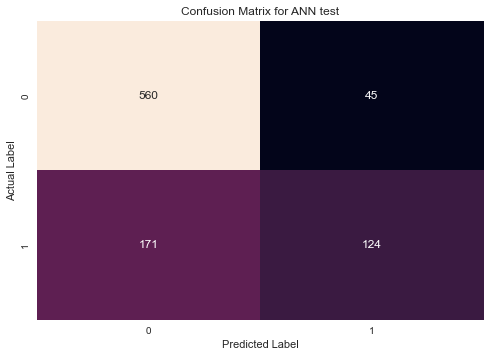

In [130]:
models_names={mlp:'ANN test'}

print('Accuracy for {} model is'.format(models_names[mlp]),'\n',accuracy_score(y_test,y_test_predict_mlp))
print('\n')
print('Classification report for {} model is'.format(models_names[mlp]),'\n',classification_report(y_test,y_test_predict_mlp))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[mlp]))
sns.heatmap(confusion_matrix(y_test,y_test_predict_mlp),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[mlp]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

AUC:  0.801


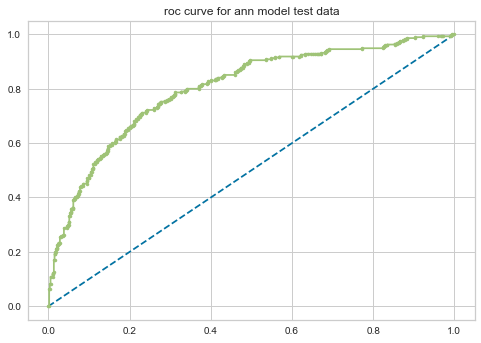

In [131]:
probs_ann_model=best_grid_mlp.predict_proba(x_test_scaled)
probs_ann_model=probs_ann_model[:,1]

auc=roc_auc_score(y_test,probs_ann_model)
print('AUC: % .3f'%auc)

fpr,tpr,threshold=roc_curve(y_test,probs_ann_model)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.title('roc curve for ann model test data')
plt.show()

AS we can see that the accuracy of train model is 77.0, recall is 0.49,precision is 0.67 and auc is 81.3 whereas for test data the accuracy is 76.0, recall is 0.67, precision is 0.74 and auc is 80.1. Although the test data is performing close to the train data we definitely have a room here for improvement in our training data to improve the accuracy further. With respect to the Decision Tree (CART) model  and Random Forest model,  we dont see any marginal improvement in ANN model. 

#### 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

For comarison we can compare Decision Tree and Random forest as the data was not scaled for modelling. we cannot compare ANN with them as the data was scaled for ANN model. However we can still see the comparison for all three for non scaled data and can compare the results.

Comparing Models on The Decision tree classifier and Random forest test set

In [132]:
models=[dt_model,rfcl,mlp]
models_names={dt_model:'DecisionTreeClassifier',rfcl:'RandomForestClassifier',mlp:'ANN'}

Accuracy for DecisionTreeClassifier model is 
 0.7166666666666667


Classification report for DecisionTreeClassifier model is 
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       605
           1       0.58      0.49      0.53       295

    accuracy                           0.72       900
   macro avg       0.67      0.66      0.66       900
weighted avg       0.71      0.72      0.71       900



Confusion Matrix for DecisionTreeClassifier model is


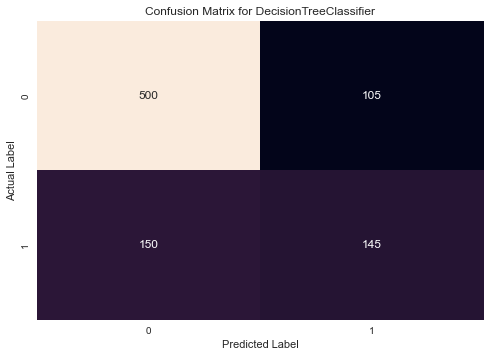

Accuracy for RandomForestClassifier model is 
 0.7577777777777778


Classification report for RandomForestClassifier model is 
               precision    recall  f1-score   support

           0       0.78      0.90      0.83       605
           1       0.69      0.47      0.56       295

    accuracy                           0.76       900
   macro avg       0.73      0.68      0.70       900
weighted avg       0.75      0.76      0.74       900



Confusion Matrix for RandomForestClassifier model is


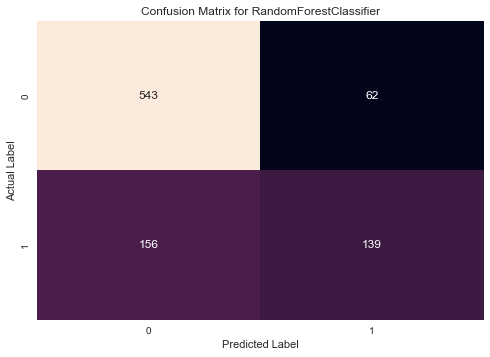

Accuracy for ANN model is 
 0.7211111111111111


Classification report for ANN model is 
               precision    recall  f1-score   support

           0       0.72      0.95      0.82       605
           1       0.72      0.24      0.36       295

    accuracy                           0.72       900
   macro avg       0.72      0.60      0.59       900
weighted avg       0.72      0.72      0.67       900



Confusion Matrix for ANN model is


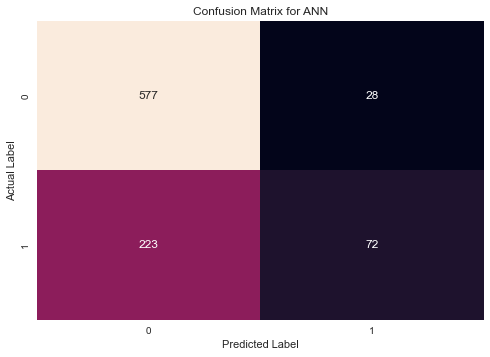

In [133]:
for i in models:
    i.fit(x_train,y_train)
    print('Accuracy for {} model is'.format(models_names[i]),'\n',accuracy_score(y_test,i.predict(x_test)))
    print('\n')
    print('Classification report for {} model is'.format(models_names[i]),'\n',classification_report(y_test,i.predict(x_test)))
    print('\n')
    print('Confusion Matrix for {} model is'.format(models_names[i]))
    sns.heatmap(confusion_matrix(y_test,i.predict(x_test)),annot=True,fmt='d',cbar=False)
    plt.title('Confusion Matrix for {}'.format(models_names[i]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

Compare ROC curves and Calculate Area under the curve Decision tree classifier and Random forest models for test set

Area under the curve for Decision Tree Classification Model is 0.8003950133071859
Area under the curve for Random Forest Classification Model is 0.8146070878274269
Area under the curve for Artificial Neural Network Model is 0.8012466732035299


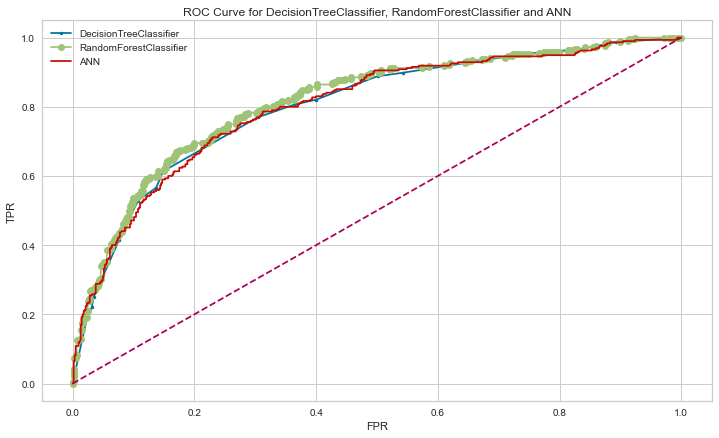

In [134]:
print('Area under the curve for Decision Tree Classification Model is',roc_auc_score(y_test,best_grid_dt_model.predict_proba(x_test)[:,1]))
print('Area under the curve for Random Forest Classification Model is',roc_auc_score(y_test,best_grid_rfcl.predict_proba(x_test)[:,1]))
print('Area under the curve for Artificial Neural Network Model is',roc_auc_score(y_test,best_grid_mlp.predict_proba(x_test_scaled)[:,1]))

plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test,best_grid_dt_model.predict_proba(x_test)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, best_grid_rfcl.predict_proba(x_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o') 

fpr_ann, tpr_ann, thresholds = roc_curve(y_test, best_grid_mlp.predict_proba(x_test_scaled)[:,1])
plt.plot(fpr_ann, tpr_ann, marker='x',) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('DecisionTreeClassifier, RandomForestClassifier and ANN'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

Conclusion
RFCL performs better than ANN and Decision Tree on the test set
CART and RFCL has the same accuracy score of ~77% while ANN has the least accuracy score of ~76% for test set.
RFCL model has the highest accuracy score of ~81% while ANN model has the least accuracy score of ~77% for training set
CART and ANN have ~80% area under the curve for testing set while RFCL has ~81% area under curve.
Model can be improved for changing grid parameters for CART and RFCL or by changing hidden layers or tolerance values for ANN model.

#### 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

Agency code: 
EPX has the maximum count with a  resonalbly lower claim settlement ratio while C2B and CWT has the maximum number of claims settled. Higher claim settled obviously means revenue loss for the company.
JZI need to improve on their business model and try to bring in more customers.
EPX business model can be studied in detail and we can try to understand the functionality and work flow of the agency and use it to improve the business models of other agencies.

Type: 
Travel agencies have more count than airlines however airlines has more number of claims settled. Airline claim settlement policy needs to be reviewed and necessary steps for improvement needs to be taken. 

channel: 
Online dominates both in count and claim settled. More and more emphasis should be made to imrove the marketting strategy and oline campains to increase the customer base.

Product name: Customized plan has the maximum count however Gold plan has the maximum number of claim settled with least customer count.These needs to be reviewed and investigated thoughly.

Destination: Maximum count is from Asia and Americas has the highest median for claim settled. With respect to count Asia is performing much better than Americas or Europe and we need to review why the median is higher with such low count of customer in this region.